# Importing libraries

In [1]:
import cv2
import os 
import tensorflow as tf 
import matplotlib.pyplot  as plt 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from tensorflow import keras
from PIL import Image
import numpy as np 
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical


In [2]:
image_directory = '../data/Training/'

no_tumor_images = os.listdir(image_directory+'no_tumor/')
yes_tumor_images = os.listdir(image_directory+'pituitary_tumor/')
dataset = []
label = []



for i,image_name in enumerate(no_tumor_images):
    image = cv2.imread(image_directory+'no_tumor/'+image_name)
    image = Image.fromarray(image,'RGB')
    image = image.resize((64,64))
    dataset.append(np.array(image))
    label.append(0)
    
for i,image_name in enumerate(yes_tumor_images):
    image = cv2.imread(image_directory+'pituitary_tumor/'+image_name)
    image = Image.fromarray(image,'RGB')
    image = image.resize((64,64))
    dataset.append(np.array(image))
    label.append(1)
    
    

In [3]:
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import  Activation,Dropout,Flatten,Dense

In [4]:
dataset=np.array(dataset)
label = np.array(label)

xtrain,xtest,ytrain,ytest = train_test_split(dataset,label,test_size=0.2,random_state=0)

print(xtrain.shape)

(977, 64, 64, 3)


In [5]:
# Reshape=(n,image_width,image_height,n_channel)

print(xtest.shape)

(245, 64, 64, 3)


In [6]:
xtrain= normalize(xtrain,axis = 1)
xtest = normalize(xtest , axis = 1) 

ytrain = to_categorical(ytrain,num_classes=2)
ytest = to_categorical(ytest,num_classes=2)


In [7]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model = Sequential()
model.add(Conv2D(32,(3,3),kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model = Sequential()
model.add(Conv2D(64,(3,3),kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))


In [8]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics =['accuracy'])
history = model.fit(xtrain,ytrain,batch_size=16,verbose=1,epochs=10,validation_data=(xtest,ytest),shuffle=False,validation_split=0.33)

model.save('BrainTumourTrainingModel.h5')

Epoch 1/10
62/62 [==============================] - 12s 176ms/step - loss: 0.7207 - accuracy: 0.7462 - val_loss: 0.1930 - val_accuracy: 0.9429
Epoch 2/10
62/62 [==============================] - 10s 165ms/step - loss: 0.2146 - accuracy: 0.9232 - val_loss: 0.0937 - val_accuracy: 0.9673
Epoch 3/10
62/62 [==============================] - 10s 170ms/step - loss: 0.1413 - accuracy: 0.9406 - val_loss: 0.0752 - val_accuracy: 0.9755
Epoch 4/10
62/62 [==============================] - 10s 167ms/step - loss: 0.0956 - accuracy: 0.9560 - val_loss: 0.0443 - val_accuracy: 0.9837
Epoch 5/10
62/62 [==============================] - 10s 161ms/step - loss: 0.0651 - accuracy: 0.9713 - val_loss: 0.0372 - val_accuracy: 0.9837
Epoch 6/10
62/62 [==============================] - 10s 156ms/step - loss: 0.0507 - accuracy: 0.9754 - val_loss: 0.0548 - val_accuracy: 0.9837
Epoch 7/10
62/62 [==============================] - 10s 169ms/step - loss: 0.0589 - accuracy: 0.9744 - val_loss: 0.0518 - val_accuracy: 0.9796

In [9]:
print(history.history.keys())
model.summary()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 activation_2 (Activation)   (None, 62, 62, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 61504)             0         
                                                                 
 dense (Dense)               (None, 64)                3936320   
                                                                 
 activation_3 (Activation)   (None, 64)                0    

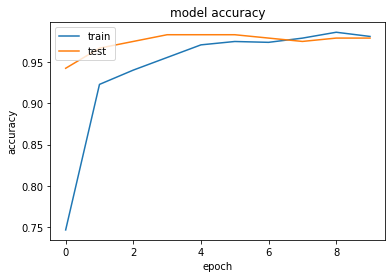

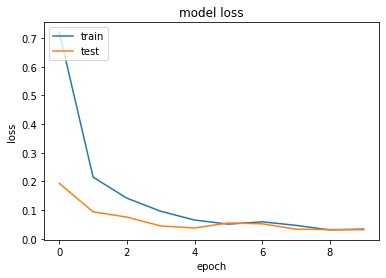

In [10]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
score, acc = model.evaluate(xtest, ytest,verbose=1, batch_size= 16)
print('test accuracy:', acc)

predict_x=model.predict(xtest) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

16/16 [==============================] - 0s 13ms/step - loss: 0.0311 - accuracy: 0.9796
test accuracy: 0.9795918464660645
8/8 [==============================] - 0s 21ms/step
[1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1
 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1]


In [12]:


image = cv2.imread('../data/Testing/pituitary_tumor/image(15).jpg')

img = Image.fromarray(image)
img = img.resize((64,64))

img = np.array(img)



print(img)

[[[ 0  0  0]
  [ 0  0  0]
  [ 1  1  1]
  ...
  [ 1  1  1]
  [ 1  1  1]
  [ 0  0  0]]

 [[ 5  5  5]
  [ 5  5  5]
  [ 5  5  5]
  ...
  [ 5  5  5]
  [ 5  5  5]
  [ 4  4  4]]

 [[ 6  6  6]
  [ 6  6  6]
  [ 6  6  6]
  ...
  [ 6  6  6]
  [ 6  6  6]
  [ 5  5  5]]

 ...

 [[11 11 11]
  [12 12 12]
  [29 29 29]
  ...
  [50 50 50]
  [18 18 18]
  [ 9  9  9]]

 [[12 12 12]
  [12 12 12]
  [17 17 17]
  ...
  [37 37 37]
  [15 15 15]
  [ 9  9  9]]

 [[ 5  5  5]
  [ 6  6  6]
  [ 6  6  6]
  ...
  [13 13 13]
  [ 6  6  6]
  [ 4  4  4]]]


In [13]:
input_img = np.expand_dims(img,axis = 0)
predict_x=model.predict(input_img) 
classes_x=np.argmax(predict_x,axis=1)

result = (model.predict(input_img)>0.5).astype("int32")
print(result)
print(classes_x)
#actual = np.argmax(ytest,axis = 1)

1/1 [==============================] - 0s 37ms/step
[[0 1]]
[1]


In [14]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

1/1 [==============================] - 0s 30ms/step


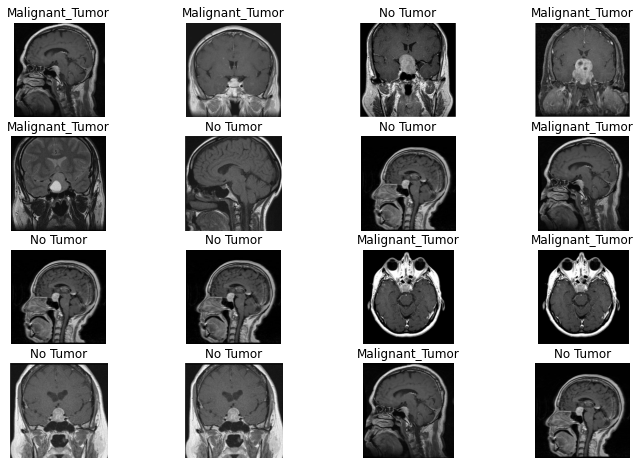

In [15]:
plt.figure(figsize=(12,8)) 
p = os.listdir('../data/Testing/')
c = 1
for  i in os.listdir('../data/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    img = cv2.imread('../data/Testing/pituitary_tumor/'+i)
    img1 = Image.fromarray(img)
    img1 = img1.resize((64,64))
    img1 = np.array(img1)
    input_img=np.expand_dims(img1,axis = 0)
    predict_x=model.predict(input_img) 
    classes_x=np.argmax(predict_x,axis=1) 
    if(classes_x==[[1]]):
        plt.title('Malignant_Tumor')
    else:
        plt.title('No Tumor')
    plt.imshow(img,cmap = 'gray')
    plt.axis('off')
    c += 1

1/1 [==============================] - 0s 34ms/step


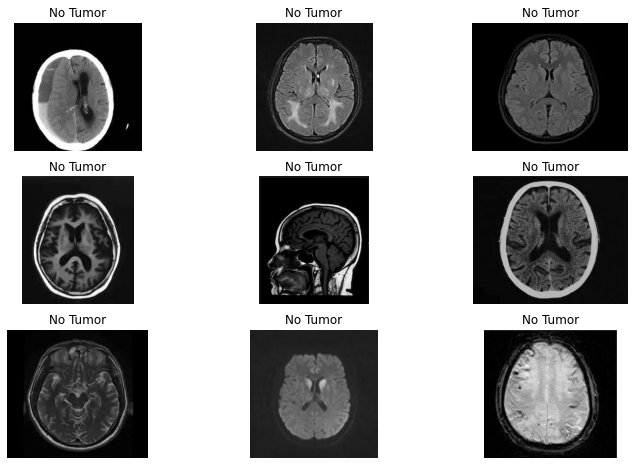

In [16]:
plt.figure(figsize=(12,8)) 
p = os.listdir('../data/Testing/')
c = 1
for  i in os.listdir('../data/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    img = cv2.imread('../data/Testing/no_tumor/'+i)
    img1 = Image.fromarray(img)
    img1 = img1.resize((64,64))
    img1 = np.array(img1)
    input_img=np.expand_dims(img1,axis = 0)
    predict_x=model.predict(input_img) 
    classes_x=np.argmax(predict_x,axis=1) 
    if(classes_x==[[1]]):
        plt.title('Malignant_Tumor')
    else:
        plt.title('No Tumor')
    plt.imshow(img,cmap = 'gray')
    plt.axis('off')
    c += 1